#### Analysis of the GPU power consumption for training the model

The GPU power consumption is measured by nvidia-smi using the following command line command:

`nvidia-smi --query-gpu=index,timestamp,power.draw,clocks.sm,clocks.mem,clocks.gr --format=csv -l 10 -f ./GPU-stats.csv`

This saves the current power consumption every 10 seconds, and other information of the GPU in the file `GPU-stats-*.csv` in the Data/GPU/ directory.

The training was performed on a GTX 1070, CUDA 11.6 and CuDNN 8.5.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### ResNet-50

In [2]:
resnet_data = pd.read_csv('../Data/GPU/GPU-stats-resnet.csv')
resnet_data[' timestamp'] = pd.to_datetime(resnet_data[' timestamp'])
resnet_data[' timestamp'] = resnet_data[' timestamp'].dt.strftime('%H:%M:%S')
resnet_data[' power.draw [W]'] = resnet_data[' power.draw [W]'].str.replace('W', '').astype(float)
resnet_data.head()

,index,timestamp,power.draw [W],clocks.current.sm [MHz],clocks.current.memory [MHz],clocks.current.graphics [MHz]
0,0,13:01:49,8.27,141 MHz,405 MHz,141 MHz
1,0,13:01:59,7.63,95 MHz,405 MHz,95 MHz
2,0,13:02:09,7.73,83 MHz,405 MHz,83 MHz
3,0,13:02:19,33.71,1506 MHz,4006 MHz,1506 MHz
4,0,13:02:29,33.03,1506 MHz,3802 MHz,1506 MHz


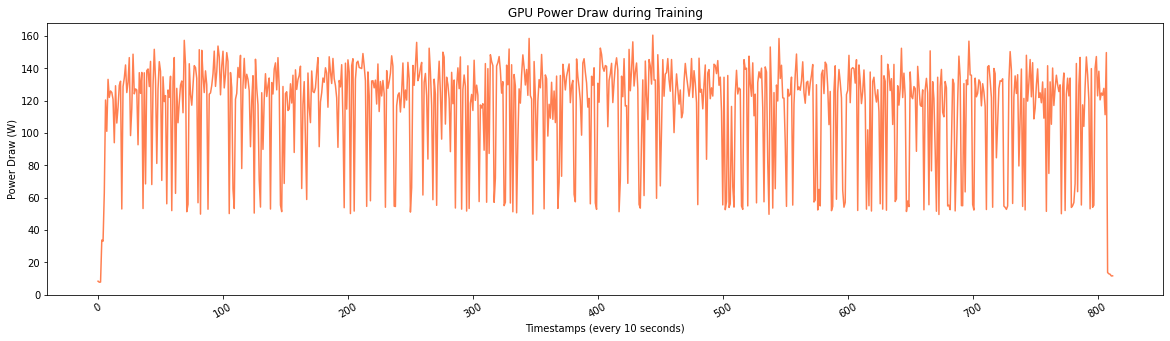

In [3]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,len(resnet_data[' power.draw [W]']),1), resnet_data[' power.draw [W]'], color='coral', label='Power Draw')
plt.xlabel('Timestamps (every 10 seconds)')
plt.xticks(rotation=30)
plt.ylabel('Power Draw (W)')
plt.title('GPU Power Draw during Training')
plt.show()

In [4]:
total_energy_usage = resnet_data[' power.draw [W]'].sum()
kWh = total_energy_usage * ( len(resnet_data[' power.draw [W]']) / 3600 ) / 1000
print(f' Total energy usage = {total_energy_usage}W or {round(kWh, 2)}KWh')

 Total energy usage = 93474.32W or 21.11KWh


#### ConvNext

In [5]:
convnext_data = pd.read_csv('../Data/GPU/GPU-stats-convnext.csv')
convnext_data[' timestamp'] = pd.to_datetime(convnext_data[' timestamp'])
convnext_data[' timestamp'] = convnext_data[' timestamp'].dt.strftime('%H:%M:%S')
convnext_data[' power.draw [W]'] = convnext_data[' power.draw [W]'].str.replace('W', '').astype(float)
convnext_data.head()

,index,timestamp,power.draw [W],clocks.current.sm [MHz],clocks.current.memory [MHz],clocks.current.graphics [MHz]
0,0,15:46:41,9.34,192 MHz,405 MHz,192 MHz
1,0,15:46:52,10.50,183 MHz,405 MHz,183 MHz
2,0,15:47:02,10.26,212 MHz,405 MHz,212 MHz
3,0,15:47:12,11.03,225 MHz,405 MHz,225 MHz
4,0,15:47:22,10.02,230 MHz,405 MHz,230 MHz


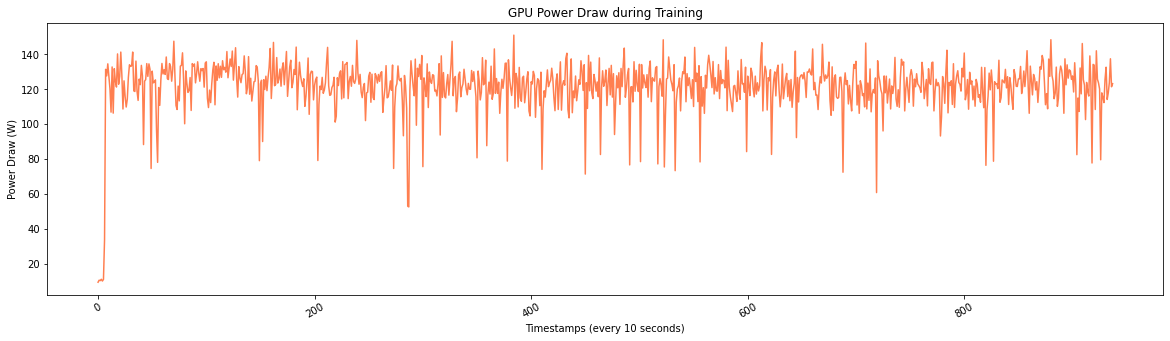

In [6]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,len(convnext_data[' power.draw [W]']),1), convnext_data[' power.draw [W]'], color='coral', label='Power Draw')
plt.xlabel('Timestamps (every 10 seconds)')
plt.xticks(rotation=30)
plt.ylabel('Power Draw (W)')
plt.title('GPU Power Draw during Training')
plt.show()

In [7]:
total_energy_usage = convnext_data[' power.draw [W]'].sum()
kWh = total_energy_usage * ( len(convnext_data[' power.draw [W]']) / 3600 ) / 1000
print(f' Total energy usage = {total_energy_usage}W or {round(kWh, 2)}KWh')

 Total energy usage = 113903.22W or 29.68KWh


** After not even 6 epochs

#### Comparison

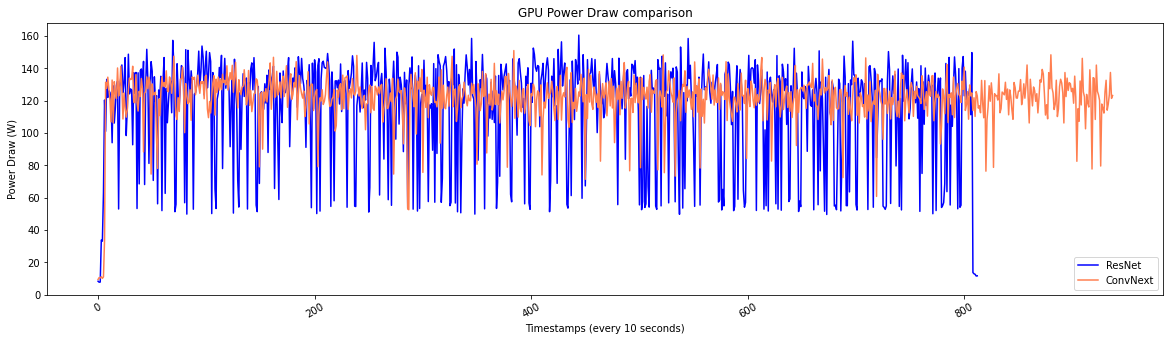

In [8]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,len(resnet_data[' power.draw [W]']),1), resnet_data[' power.draw [W]'], color='blue', label='ResNet')
plt.plot(np.arange(0,len(convnext_data[' power.draw [W]']),1), convnext_data[' power.draw [W]'], color='coral', label='ConvNext')
plt.xlabel('Timestamps (every 10 seconds)')
plt.xticks(rotation=30)
plt.ylabel('Power Draw (W)')
plt.legend()
plt.title('GPU Power Draw comparison')
plt.show()